## Model Building

Now after processing both our audio file, we go the last stage which is building the model. For now we will be using
```SVM``` to building our model because it is one of the models solves classification problems

In [2]:
# Import all the necessary libraries
import sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import confusion_matrix
import warnings

# Filter out warnings to maintain a clean output
warnings.filterwarnings('ignore')
sys.path.append('/home/ayikanying/Sleepiz/sleepiz_sleep_analysis')

# Step one:
    1 Merge Dataframe 
     - Since our processed data has been save in csv file with is located in the data/csv directory, we begin by merging the data

In [2]:
import numpy as np
from src.IO.dataLoader import AudioLoader
filepath1 = "../data/csv/snoring.csv"
filepath2 = "../data/csv/non_snoring.csv"
merge_dataframe = AudioLoader()
data = merge_dataframe.merge_dataframes(filepath1, filepath2)

## Step 2: Model Building
    1 - Get the targer and features
    2 - Splitting the data into X_train, X_test, y_train, y_test
    3 - Training the model
    4 - Evaluating the model

In [3]:
# Import the classifier an instantiate it
from utils.model.SVModel.SVModel import SVModel
svm_classifier = SVModel(C=5, kernel="rbf", dataframe=data)

### Get the target and features

In [4]:
X, y = svm_classifier.get_X_and_y("features", "label")

### Split the data into X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = svm_classifier.train_test_split(X, y)

### Train the model

In [6]:
model = svm_classifier.train_model(X_train, y_train)
model

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))])

In [7]:
X, y = svm_classifier.get_X_and_y("features", "label")

### Evaluating the model

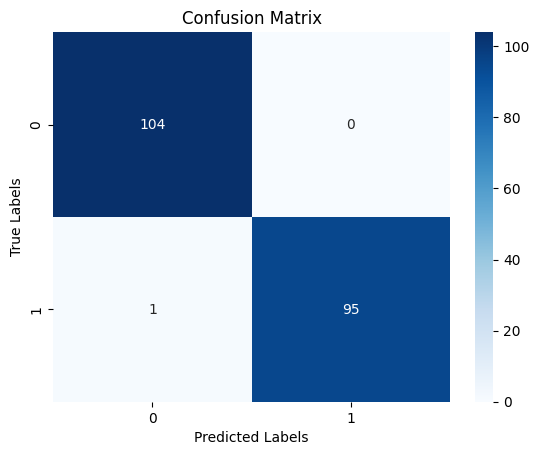

In [8]:
model_evaluation = svm_classifier.evaluate_model(X_test, y_test, model)

In [9]:
from pathlib import Path


model_filepath = Path("../model/classifer.pkl")
svm_classifier.save_model(classifier=model, model_filepath=model_filepath)

Model saved successfully.


In [3]:
import pickle


with open("../model/classifer.pkl", "rb") as model:
    classifier = pickle.load(model)

In [8]:
import librosa
from src.FeatureExtraction.extract_features import extract_mfcc_features
feature_extractor = extract_mfcc_features

import librosa
import numpy as np

import librosa
import numpy as np
from sklearn.svm import SVC  # Import your classifier here
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score  # Import the appropriate metric for evaluation


def segment_and_extract_features(audio_file, segment_duration=1):
    try:
        # Load the audio file
        audio, sr = librosa.load(audio_file, sr=None)

        # Calculate the window size based on the segment duration
        window_size = int(segment_duration * sr)

        # Initialize variables
        features_pred = []

        for i in range(0, len(audio), window_size):
            start = i
            end = start + window_size

            # Ensure that the segment corresponds to exactly one second
            if end <= len(audio):
                signal = audio[start:end]  # Segmented audio clip (one second)
                mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=64)
                log_spec = librosa.power_to_db(mel_spec)
                features_pred.append(log_spec)

        return features_pred

    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage:
audio_file_path = "../output_audio.wav"
segments = segment_and_extract_features(audio_file_path)

KeyboardInterrupt: 

In [12]:
segments

TypeError: makePredictions() got multiple values for argument 'audio_file'